In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
import katdal
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as ac
import functools
import healpy as hp
import optparse
import warnings
from matplotlib.backends.backend_pdf import PdfPages
import healpy as hp
from astropy import units as u
from matplotlib.offsetbox import AnchoredText
import time
import pickle
import sys
from datetime import datetime
import json
import katcali
import katcali.visualizer as kv
import katcali.models as km
import katcali.rfi as kr
import katcali.solver as ks
import katcali.io as kio
import katcali.label_dump as kl
import katcali.diode as kd
import katcali.filter as kf
import katcali.beam as kb
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.sparse import coo_matrix
import astropy.wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.io import fits
from astropy.wcs import WCS
from scipy.interpolate import UnivariateSpline
import matplotlib.colors as colors
import pysm
from pysm.nominal import models
Tcmb=2.725
k_B = 1.38E-23

In [159]:
print ('start @ ' + time.asctime(time.localtime(time.time())) +'...')

start @ Mon Sep  8 16:01:09 2025...


In [160]:
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])
plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 14, 1.5, 1.5
#plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 10.0, 0.8, 1.5
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])

14.0 1.5 1.5
14.0 1.5 1.5


In [179]:
pix_deg=0.5 #0.15 #0.3
std_sigma=4. #2023 #the smaller number will make more data be delated 

# ch_plot = 3200
# ch_plot = 1175  # 700 MHz in UHF band
ch_plot = 1692

niter = 3

p_radec=np.loadtxt('radio_source_fsky.txt')
ptr_pix=np.loadtxt('../level5/desi2_radio_sourceUHF_pix_'+str(pix_deg)+'deg.txt')
ptr_ra_pix,ptr_dec_pix=ptr_pix[:,0],ptr_pix[:,1]

In [180]:
# # desi 1, _20250609_150000, _20250729_070000, _20250805_100000, _20250806_030000, _20250815_153000
# fname_list = [
#     "1675021905", "1676313206", "1677195529", "1678381591", "1679605292", "1675210948",
#     "1676657789", "1677777992", "1678467685", "1682448988", "1675623808", "1677002481",
#     "1677795989", "1678726283", "1675643846", "1677020482", "1678122565", "1678743988",
#     "1675816512", "1677174749", "1678295187", "1678899080", "1684087370"
# ]
# root_list = []
# for fname in fname_list:
#     root_list.append(f'level5_{fname}_20250729_070000')

# desi 2, _20250714_070000, _20250729_070000
# fname_list = [
#     "1675632179", "1677011008", "1677183387", "1678734987", "1679247986", "1679333668",
#     "1679419886", "1679615321", "1680626188", "1680644082", "1680798562", "1681143685",
#     "1681229848", "1681920680", "1683492604", "1684781618", "1685641589", "1688399183",
#     "1689003684", "1689090392", "1689176790"
# ]
# fname_list = ['1675632179', '1679247986', '1680626188']
fname_list = ['1675632179']
root_list = []
for fname in fname_list:
    root_list.append(f'level5_{fname}_20250729_070000')

In [181]:
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
timestamp = 'desi2_20250829_033000'
# input_file='../level5/results/py_results/'
input_file=f'./results/jupyter_results/{timestamp}/'
output_file = input_file
os.makedirs(input_file, exist_ok=True)
os.makedirs(input_file + 'figures/', exist_ok=True)

In [182]:
total_count_MAX = 58

In [183]:
with open(os.path.join(input_file, 'metadata.json'), 'r') as f:
    metadata = json.load(f)
assert(metadata['fname_list'] == fname_list)
assert(metadata['pix_deg'] == pix_deg)
assert(metadata['root_list'] == root_list)
assert(metadata['std_sigma'] == std_sigma)
assert(metadata['total_count_MAX'] == total_count_MAX)
assert(metadata['niter'] == niter)

# Plot figures

In [184]:
total_count = total_count_MAX

In [185]:
Fits0=input_file+'ALL_scan'+str(total_count)+'_Tsky_cube_p'+str(pix_deg)+'d.fits'
Tsky_ALL = fits.open(Fits0)[0].data
print(np.shape(Tsky_ALL))

(105, 49, 4096)


(105, 49, 4096)
(105, 49, 4096)
(105, 49, 4096)


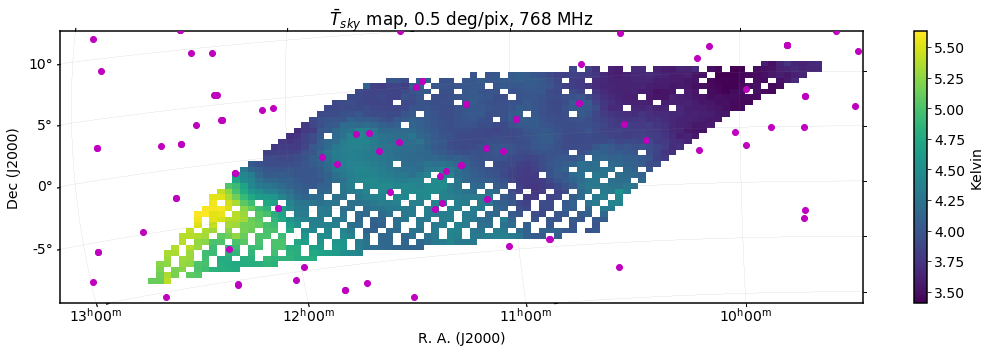

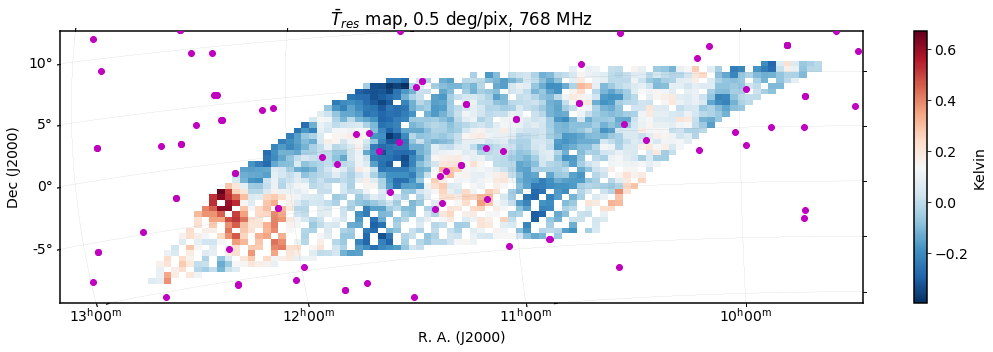

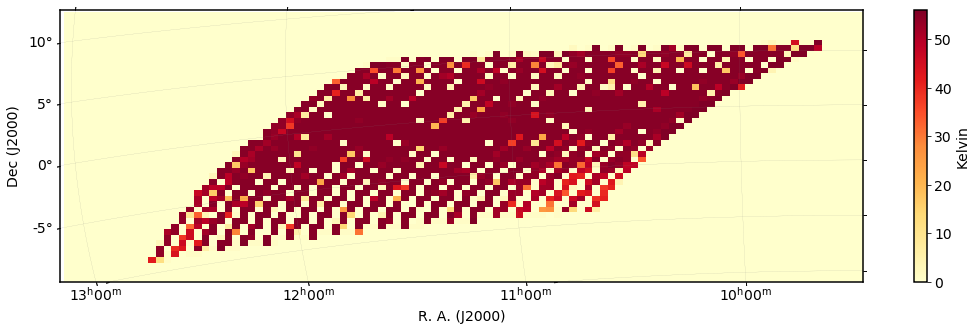

In [186]:
savefig = False

Fits0=input_file+'ALL_scan'+str(total_count_MAX)+'_Tsky_cube_p'+str(pix_deg)+'d.fits'
Tsky_ALL = fits.open(Fits0)[0].data
print (np.shape(Tsky_ALL))

Fits1=input_file+'ALL_scan'+str(total_count_MAX)+'_Tresi_cube_p'+str(pix_deg)+'d.fits'
Tresi_ALL = fits.open(Fits1)[0].data
print (np.shape(Tresi_ALL))

Fits2=input_file+'ALL_scan'+str(total_count_MAX)+'_Npix_count_cube_p'+str(pix_deg)+'d.fits'
Count_ALL = fits.open(Fits2)[0].data
print (np.shape(Count_ALL))

# Fits3=input_file+'ALL_scan'+str(total_count_MAX)+'_P_xy_count_p0.3d.fits'
# cube3 = fits.open(Fits3)[0].data
# print (np.shape(cube3))

# total_count_plot = 812
Npix_x= np.shape(Count_ALL)[0]
Npix_y= np.shape(Count_ALL)[1]

w=WCS(Fits0).dropaxis(-1)

plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
# plt.imshow(Tsky_ALL[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=2.9,vmax=3.55)
plt.imshow(Tsky_ALL[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.title(r'$\bar T_{sky}$'+' map, '+str(pix_deg)+' deg/pix, '
                              +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
if savefig:
    plt.savefig(output_file+'F_Tsky_ALL_ch'+str(ch_plot)+'_iter0.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
# plt.imshow(Tresi_ALL[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.25, vmax=0.25)
plt.imshow(Tresi_ALL[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
#plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    

plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.title(r'$\bar T_{res}$'+' map, '+str(pix_deg)+' deg/pix, '
                              +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
if savefig:
    plt.savefig(output_file+'F_Tresi_ALL_ch'+str(ch_plot)+'_iter0.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(Count_ALL[:,:,ch_plot].T,cmap=kv.cmap3(),aspect='auto')
# plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
if savefig:
    plt.savefig(output_file+'ALL_count'+str(ch_plot)+'_iter0.png', bbox_inches='tight')
plt.show()

(105, 49, 4096)
(105, 49, 4096)
(105, 49, 4096)


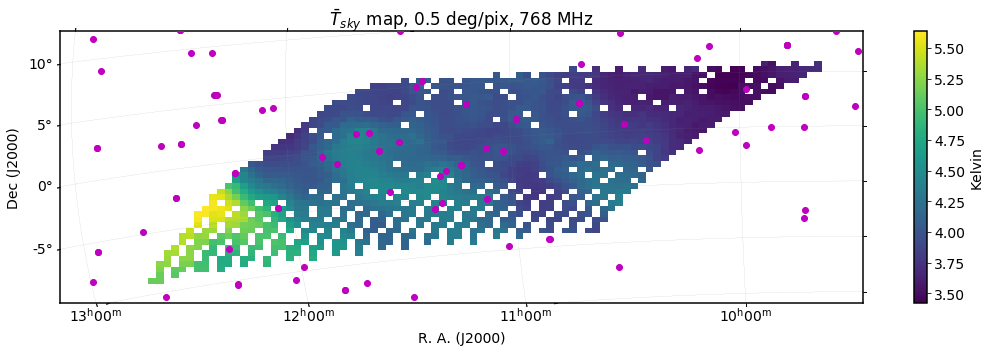

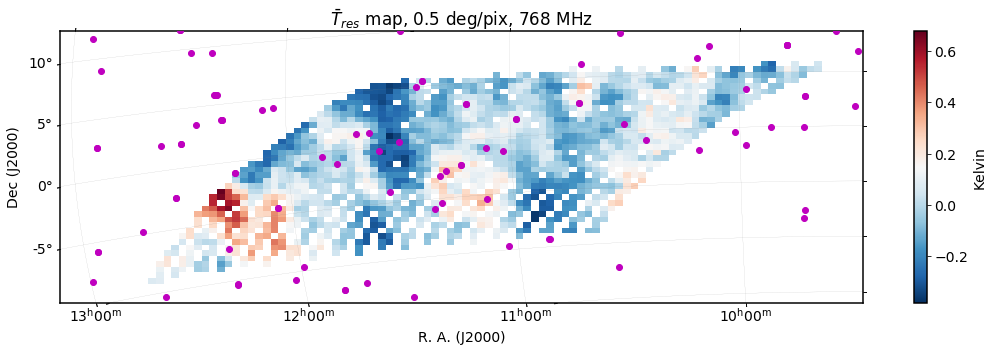

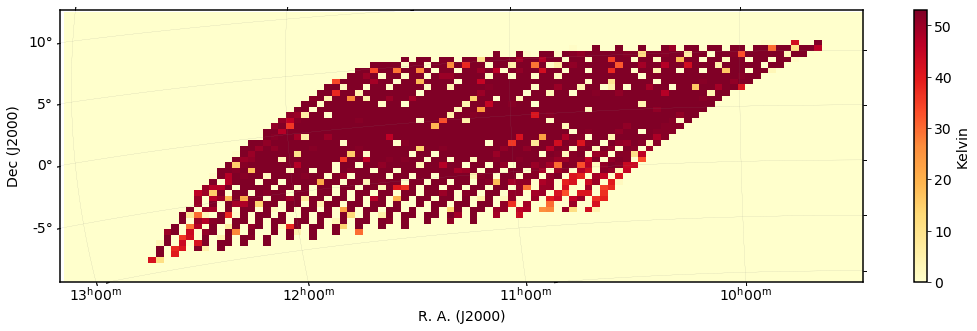

In [178]:
savefig = False
# total_count_list = [575, 572, 572]

for i_iter in [2]:
    Fits0=input_file+'Nscan'+str(total_count)+'_Tsky_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tsky_i = fits.open(Fits0)[0].data
    print (np.shape(Tsky_i))
    
    Fits1=input_file+'Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tresi_i = fits.open(Fits1)[0].data
    print (np.shape(Tresi_i))
    
    Fits2=input_file+'Nscan'+str(total_count)+'_Npix_count_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Count_i = fits.open(Fits2)[0].data
    print (np.shape(Count_i))
    
    # Fits3=input_file+'ALL_scan'+str(total_count)+'_P_xy_count_p0.3d.fits'
    # cube3 = fits.open(Fits3)[0].data
    # print (np.shape(cube3))
    
    # total_count_plot = total_count_list[i_iter]
    Npix_x= np.shape(Count_ALL)[0]
    Npix_y= np.shape(Count_ALL)[1]
    
    w=WCS(Fits0).dropaxis(-1)
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=4.0,vmax=6.0)
    plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{sky}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.4, vmax=0.4)
    plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    #plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    
    
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{res}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    plt.imshow(Count_i[:,:,ch_plot].T,cmap=kv.cmap3(),aspect='auto')
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

(105, 49, 4096)
(105, 49, 4096)
(105, 49, 4096)


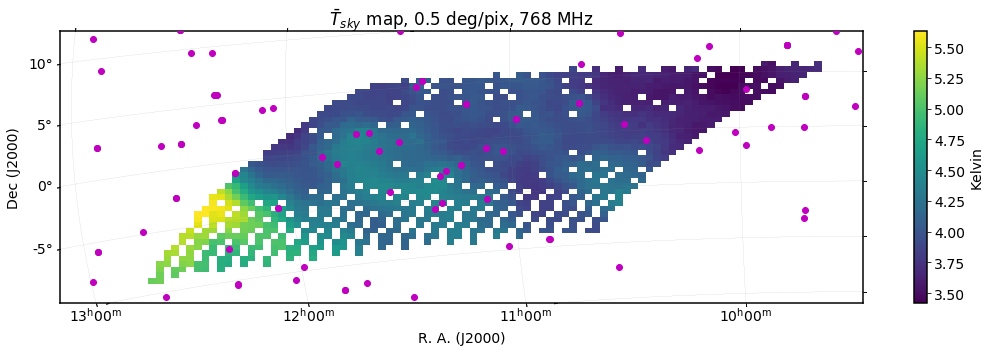

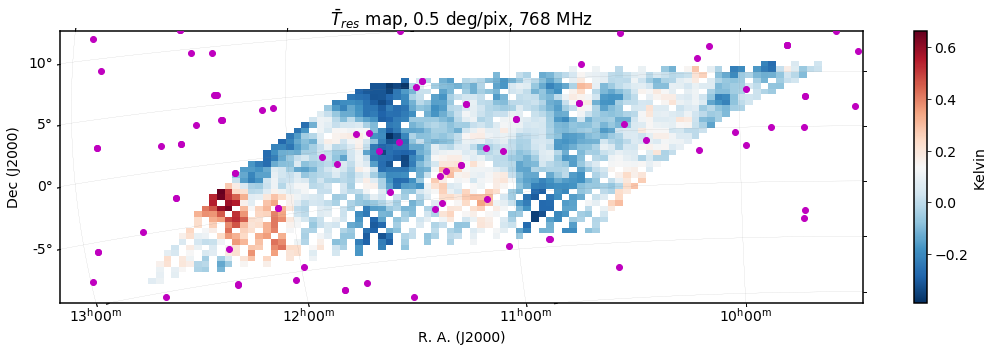

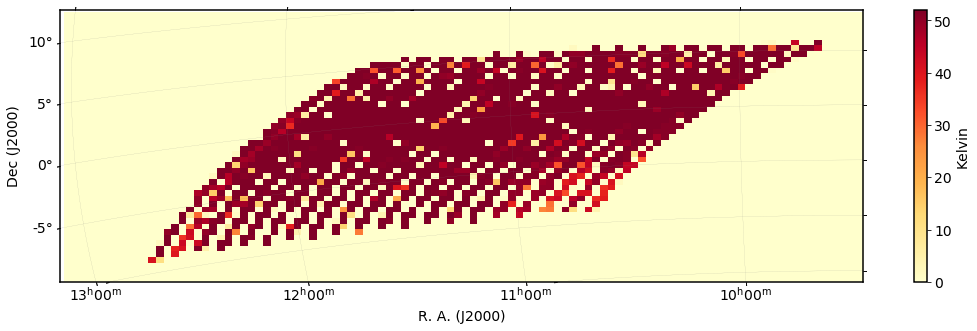

In [157]:
savefig = False
# total_count_list = [575, 572, 572]

for i_iter in [2]:
    Fits0=input_file+'Nscan'+str(total_count)+'_Tsky_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tsky_i = fits.open(Fits0)[0].data
    print (np.shape(Tsky_i))
    
    Fits1=input_file+'Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tresi_i = fits.open(Fits1)[0].data
    print (np.shape(Tresi_i))
    
    Fits2=input_file+'Nscan'+str(total_count)+'_Npix_count_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Count_i = fits.open(Fits2)[0].data
    print (np.shape(Count_i))
    
    # Fits3=input_file+'ALL_scan'+str(total_count)+'_P_xy_count_p0.3d.fits'
    # cube3 = fits.open(Fits3)[0].data
    # print (np.shape(cube3))
    
    # total_count_plot = total_count_list[i_iter]
    Npix_x= np.shape(Count_ALL)[0]
    Npix_y= np.shape(Count_ALL)[1]
    
    w=WCS(Fits0).dropaxis(-1)
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=4.0,vmax=6.0)
    plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{sky}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.4, vmax=0.4)
    plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    #plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    
    
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{res}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    plt.imshow(Count_i[:,:,ch_plot].T,cmap=kv.cmap3(),aspect='auto')
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

(105, 49, 4096)
(105, 49, 4096)
(105, 49, 4096)


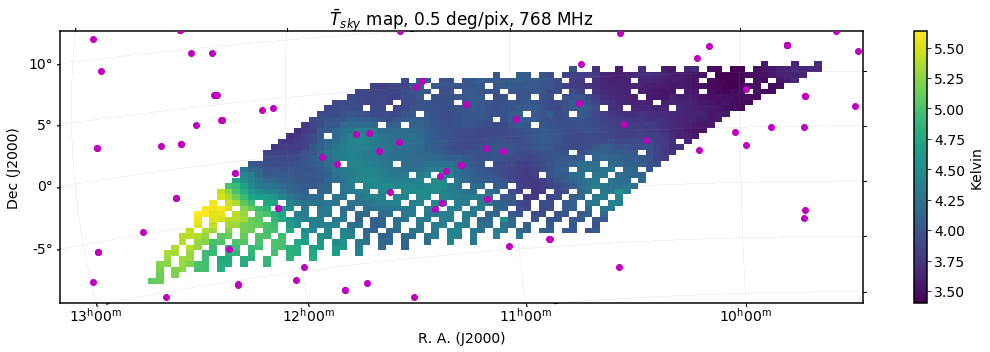

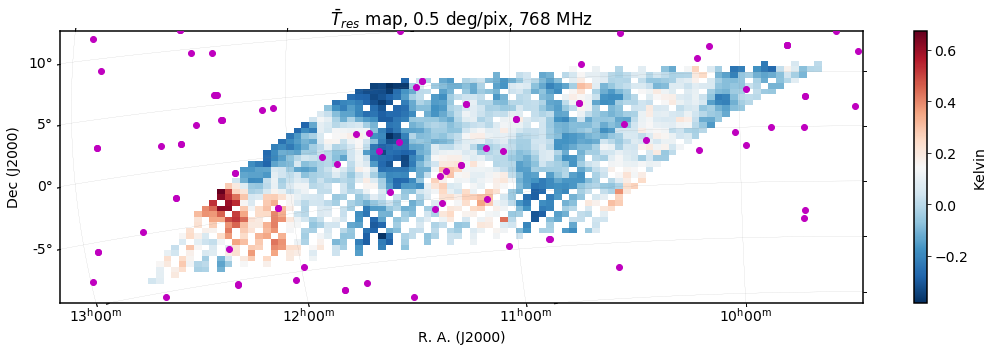

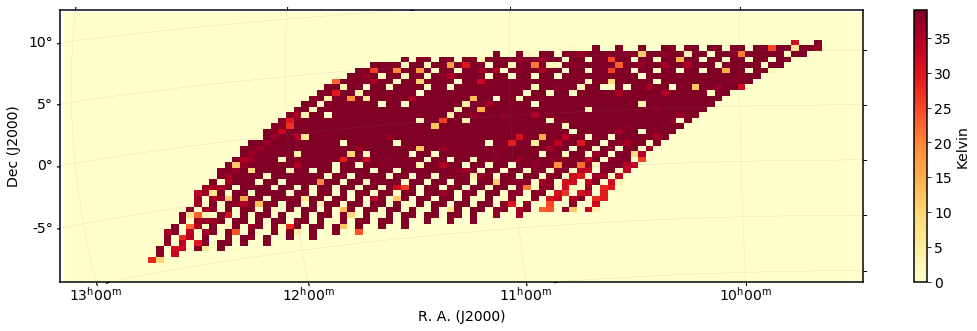

In [169]:
savefig = False
# total_count_list = [575, 572, 572]

for i_iter in [2]:
    Fits0=input_file+'Nscan'+str(total_count)+'_Tsky_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tsky_i = fits.open(Fits0)[0].data
    print (np.shape(Tsky_i))
    
    Fits1=input_file+'Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tresi_i = fits.open(Fits1)[0].data
    print (np.shape(Tresi_i))
    
    Fits2=input_file+'Nscan'+str(total_count)+'_Npix_count_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Count_i = fits.open(Fits2)[0].data
    print (np.shape(Count_i))
    
    # Fits3=input_file+'ALL_scan'+str(total_count)+'_P_xy_count_p0.3d.fits'
    # cube3 = fits.open(Fits3)[0].data
    # print (np.shape(cube3))
    
    # total_count_plot = total_count_list[i_iter]
    Npix_x= np.shape(Count_ALL)[0]
    Npix_y= np.shape(Count_ALL)[1]
    
    w=WCS(Fits0).dropaxis(-1)
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=4.0,vmax=6.0)
    plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{sky}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.4, vmax=0.4)
    plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    #plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    
    
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{res}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    plt.imshow(Count_i[:,:,ch_plot].T,cmap=kv.cmap3(),aspect='auto')
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

(105, 49, 4096)
(105, 49, 4096)
(105, 49, 4096)


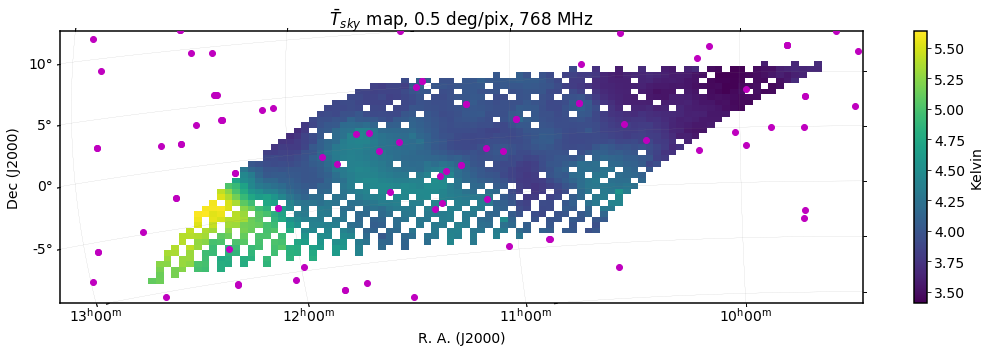

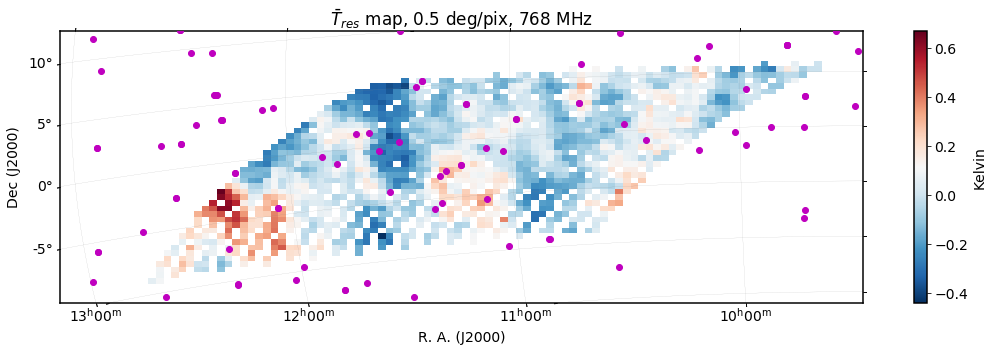

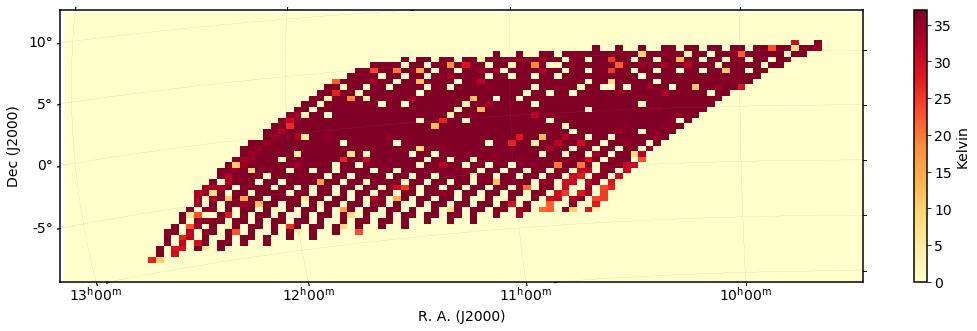

In [187]:
savefig = False
# total_count_list = [575, 572, 572]

for i_iter in [2]:
    Fits0=input_file+'Nscan'+str(total_count)+'_Tsky_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tsky_i = fits.open(Fits0)[0].data
    print (np.shape(Tsky_i))
    
    Fits1=input_file+'Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Tresi_i = fits.open(Fits1)[0].data
    print (np.shape(Tresi_i))
    
    Fits2=input_file+'Nscan'+str(total_count)+'_Npix_count_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Count_i = fits.open(Fits2)[0].data
    print (np.shape(Count_i))
    
    # Fits3=input_file+'ALL_scan'+str(total_count)+'_P_xy_count_p0.3d.fits'
    # cube3 = fits.open(Fits3)[0].data
    # print (np.shape(cube3))
    
    # total_count_plot = total_count_list[i_iter]
    Npix_x= np.shape(Count_ALL)[0]
    Npix_y= np.shape(Count_ALL)[1]
    
    w=WCS(Fits0).dropaxis(-1)
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=4.0,vmax=6.0)
    plt.imshow(Tsky_i[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{sky}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.4, vmax=0.4)
    plt.imshow(Tresi_i[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    #plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    
    
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{res}$'+' map, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    plt.imshow(Count_i[:,:,ch_plot].T,cmap=kv.cmap3(),aspect='auto')
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if savefig:
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.savefig(output_file+'figures/Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

# the Galactic model

In [14]:
nside = 64  #healpix nside, 64: Mean Spacing (deg) is 0.9161
input_file_level5='../level5/results/py_results/'

In [15]:
def cal_Gal_pix (pix_ra, pix_dec, freq, nside):
    sky_config = {
        'synchrotron': models("s1", nside),
    }

    sky = pysm.Sky(sky_config)
    
    c = SkyCoord(ra=pix_ra * u.degree, dec=pix_dec * u.degree, frame='icrs')
    theta = 90 - (c.galactic.b / u.degree).value
    phi = (c.galactic.l / u.degree).value
        
    syn = sky.synchrotron(nu=freq/1e9) / 1e6  # K
    I = hp.pixelfunc.get_interp_val(syn[0, :], theta / 180 * np.pi, phi / 180 * np.pi)
        
    return I


In [16]:
total_count = total_count_MAX
model_key = 2 #0 for full band count, to achieve a good sky coverage; 
            #1 for Tresi map, to have same coverage as Tresi in certain channel

if model_key == 2:
    Fits=output_file+'Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter2.fits'
    # Fits='ALL_scan966_Tresi_cube_p0.3d.fits'
    cube = fits.open(Fits)[0].data
    print (np.shape(cube))
    a=np.where(~np.isnan(cube[:,:,ch_plot]))
    print (np.shape(a))

if model_key==1:
    Fits=output_file+'ALL_scan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d.fits'
    # Fits='ALL_scan966_Tresi_cube_p0.3d.fits'
    cube = fits.open(Fits)[0].data
    print (np.shape(cube))
    a=np.where(~np.isnan(cube[:,:,ch_plot]))
    print (np.shape(a))
    
if model_key==0:
    #Fits='/idia/projects/hi_im/raw_vis/katcali_output/level6_output/p0.3d/ALL/ALL_scan366_Npix_count_cube_p0.3d.fits'
    Fits='ALL_scan966_Npix_count_cube_p0.3d.fits'
    cube = fits.open(Fits)[0].data
    print (np.shape(cube))
    #cube1=np.sum(cube,axis=2)
    cube1=cube[:,:,ch_plot]
    a=np.where(cube1>0)
    print (np.shape(a))

Npix_x= np.shape(cube)[0]
Npix_y= np.shape(cube)[1]
tmp=input_file_level5+root_list[-1]+'/'+fname_list[-1]+'_m005/'+fname_list[-1]+'_m005_Tsky_xy_p'+str(pix_deg)+'d.fits'
w=WCS(Fits1).dropaxis(-1)
del tmp

(105, 49, 4096)
(2, 2287)


In [17]:
pix_list_x=np.array(a[0])
pix_list_y=np.array(a[1])

In [18]:
pix_radec=pixel_to_skycoord(pix_list_x,pix_list_y,w)
pix_ra,pix_dec=(pix_radec.ra/u.deg).value,(pix_radec.dec/u.deg).value

In [19]:
gal_pix=np.zeros([Npix_x,Npix_y])
gal_pix[pix_list_x,pix_list_y]=cal_Gal_pix (pix_ra, pix_dec, kio.cal_freq_UHF(ch_plot), nside)    

if model_key in [1, 2]: #1 for Tresi map, to have same coverage as Tresi in certain channel
    gal_pix[np.isnan(cube[:,:,ch_plot])]=np.nan
if model_key==0: #0 for full band count, to achieve a good sky coverage; 
    gal_pix[np.where(cube1==0)]=np.nan

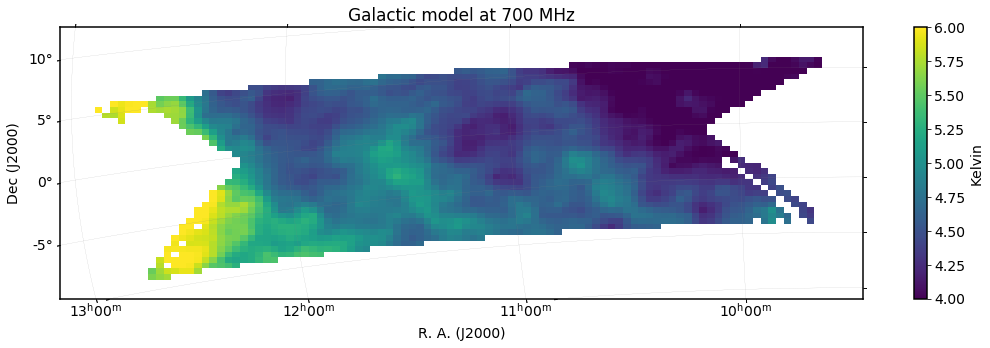

In [20]:
savefig = True

plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(gal_pix.T + Tcmb,cmap=kv.cmap1(),aspect='auto',vmin=4.0,vmax=6.0)
# plt.imshow(gal_pix.T + Tcmb,cmap=kv.cmap1(),aspect='auto')
# plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
# plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.title('Galactic model at '+str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
if savefig:
    plt.savefig(output_file + 'figures/F_Tgal_model_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
    plt.savefig(output_file + 'figures/F_Tgal_model_ch'+str(ch_plot)+'.png', bbox_inches='tight')
plt.show()

In [2]:
fname_list = ['1675632179', '1679247986', '1680626188']
input_file_2179 = './results/jupyter_results/desi2_20250829_033000/'
input_file_7986 = './results/jupyter_results/desi2_20250829_033001/'
input_file_6188 = './results/jupyter_results/desi2_20250829_033002/'
Fits_Tresi_2179 = input_file_2179 + 'Nscan58_Tresi_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Tresi_7986 = input_file_7986 + 'Nscan59_Tresi_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Tresi_6188 = input_file_6188 + 'Nscan54_Tresi_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Tsky_2179 = input_file_2179 + 'Nscan58_Tsky_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Tsky_7986 = input_file_7986 + 'Nscan59_Tsky_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Tsky_6188 = input_file_6188 + 'Nscan54_Tsky_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Npix_count_2179 = input_file_2179 + 'Nscan58_Npix_count_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Npix_count_7986 = input_file_7986 + 'Nscan59_Npix_count_cube_p0.5d_sigma4.0_iter2.fits'
Fits_Npix_count_6188 = input_file_6188 + 'Nscan54_Npix_count_cube_p0.5d_sigma4.0_iter2.fits'

In [3]:
Tresi_2179 = fits.open(Fits_Tresi_2179)[0].data
Tresi_7986 = fits.open(Fits_Tresi_7986)[0].data
Tresi_6188 = fits.open(Fits_Tresi_6188)[0].data
Tsky_2179 = fits.open(Fits_Tsky_2179)[0].data
Tsky_7986 = fits.open(Fits_Tsky_7986)[0].data
Tsky_6188 = fits.open(Fits_Tsky_6188)[0].data
Npix_count_2179 = fits.open(Fits_Npix_count_2179)[0].data
Npix_count_7986 = fits.open(Fits_Npix_count_7986)[0].data
Npix_count_6188 = fits.open(Fits_Npix_count_6188)[0].data
freqs = kio.cal_freq_UHF(np.arange(Tresi_6188.shape[2]))/1e6

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


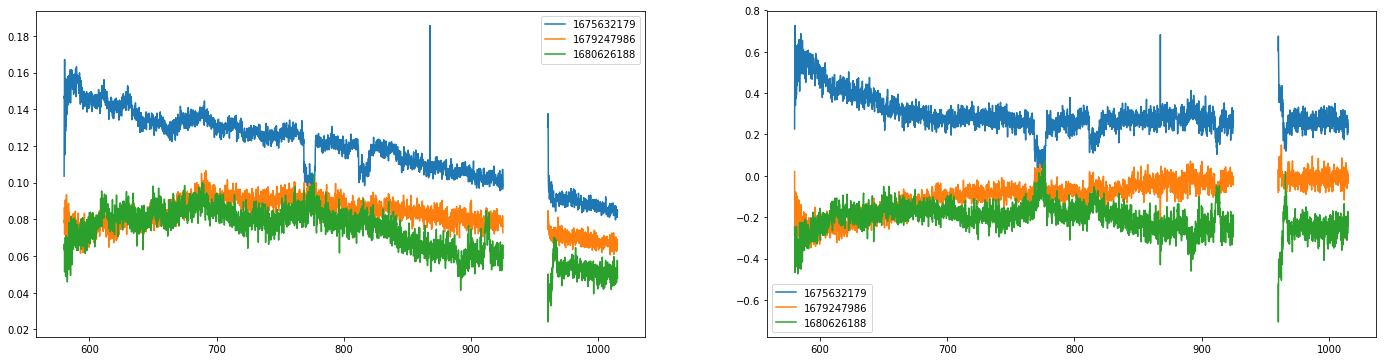

In [40]:
vstack = np.vstack([Tresi_2179[30, 25, :], Tresi_7986[30, 25, :], Tresi_6188[30, 25, :]])
mean_map = np.nanmean(vstack, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(24, 6))
axes[0].plot(freqs, Tresi_2179[30, 25, :], label=fname_list[0])
axes[0].plot(freqs, Tresi_7986[30, 25, :], label=fname_list[1])
axes[0].plot(freqs, Tresi_6188[30, 25, :], label=fname_list[2])
axes[0].legend()
axes[1].plot(freqs, (Tresi_2179[30, 25, :] - mean_map) / mean_map, label=fname_list[0])
axes[1].plot(freqs, (Tresi_7986[30, 25, :] - mean_map) / mean_map, label=fname_list[1])
axes[1].plot(freqs, (Tresi_6188[30, 25, :] - mean_map) / mean_map, label=fname_list[2])
axes[1].legend()
plt.show()

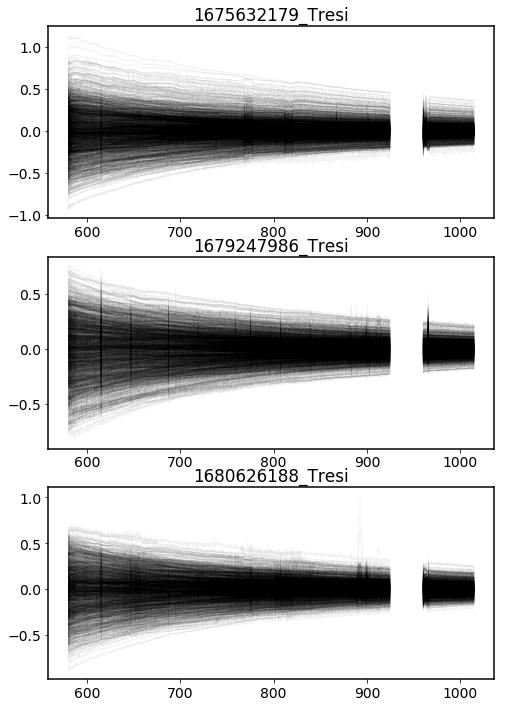

In [101]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
tmp = Tresi_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[0].plot(freqs, tmp.T, color="black", linewidth=0.5, alpha=0.05)
axes[0].set_title(fname_list[0] + '_Tresi')
tmp = Tresi_7986[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[1].plot(freqs, tmp.T, color="black", linewidth=0.5, alpha=0.05)
axes[1].set_title(fname_list[1] + '_Tresi')
tmp = Tresi_6188[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[2].plot(freqs, tmp.T, color="black", linewidth=0.5, alpha=0.05)
axes[2].set_title(fname_list[2] + '_Tresi')
plt.show()

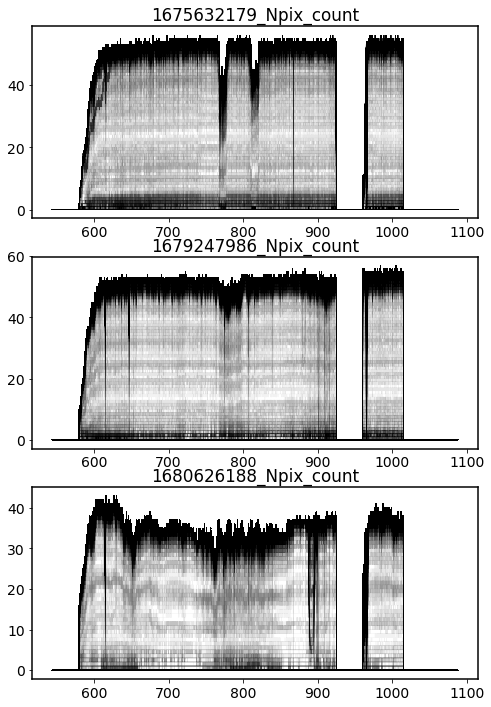

In [192]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
tmp = Npix_count_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[0].plot(freqs[:], tmp[:, :].T, color="black", linewidth=0.5, alpha=0.05)
axes[0].set_title(fname_list[0] + '_Npix_count')
tmp = Npix_count_7986[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[1].plot(freqs, tmp.T, color="black", linewidth=0.5, alpha=0.05)
axes[1].set_title(fname_list[1] + '_Npix_count')
tmp = Npix_count_6188[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[2].plot(freqs, tmp.T, color="black", linewidth=0.5, alpha=0.05)
axes[2].set_title(fname_list[2] + '_Npix_count')
plt.show()

In [97]:
np.nanmax(tmp[:, 1690])

5.632442265031801

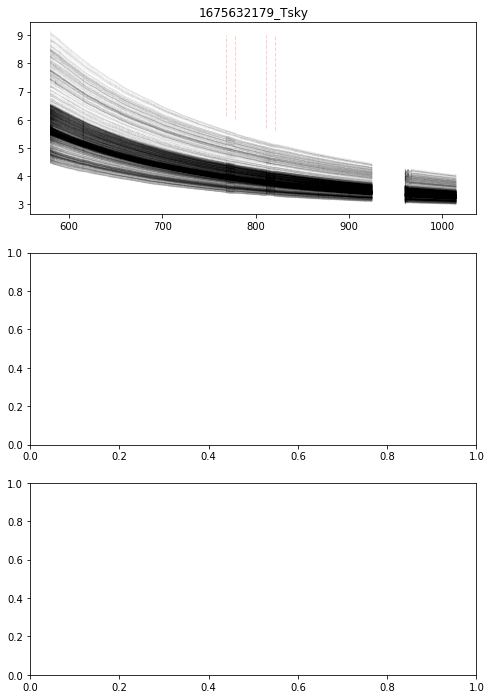

In [98]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
tmp = Tsky_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[0].vlines(x=freqs[1690], ymin=np.nanmax(tmp[:, 1690]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
axes[0].vlines(x=freqs[1759], ymin=np.nanmax(tmp[:, 1759]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
axes[0].vlines(x=freqs[2013], ymin=np.nanmax(tmp[:, 2013]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
axes[0].vlines(x=freqs[2082], ymin=np.nanmax(tmp[:, 2082]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
axes[0].plot(freqs[:], tmp[:, :].T, color="black", linewidth=0.5, alpha=0.05)
axes[0].set_title(fname_list[0] + '_Tsky')
# tmp = Tsky_7986[:, :, :]
# tmp = tmp.reshape(-1, tmp.shape[-1])
# axes[1].plot(freqs, tmp.T, color="black", linewidth=0.5, alpha=0.05)
# axes[1].set_title(fname_list[1] + '_Tsky')
# tmp = Tsky_6188[:, :, :]
# tmp = tmp.reshape(-1, tmp.shape[-1])
# axes[2].plot(freqs, tmp.T, color="black", linewidth=0.5, alpha=0.05)
# axes[2].set_title(fname_list[2] + '_Tsky')
plt.show()

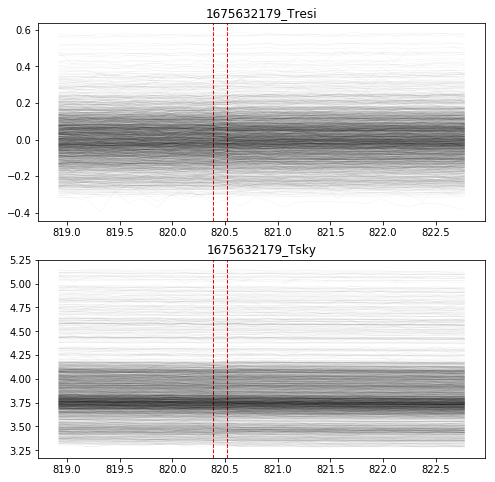

In [92]:
low = 2070
high = 2100
loc1 = freqs[1690]
loc2 = freqs[1691]
loc3 = freqs[1758]
loc4 = freqs[1759]
loc5 = freqs[2013]
loc6 = freqs[2015]
loc7 = freqs[2081]
loc8 = freqs[2082]
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
tmp = Tresi_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
# axes[0].axvline(x=loc1, color="red", linestyle="--", linewidth=1)
# axes[0].axvline(x=loc2, color="red", linestyle="--", linewidth=1)
# axes[0].axvline(x=loc3, color="red", linestyle="--", linewidth=1)
# axes[0].axvline(x=loc4, color="red", linestyle="--", linewidth=1)
# axes[0].axvline(x=loc5, color="red", linestyle="--", linewidth=1)
# axes[0].axvline(x=loc6, color="red", linestyle="--", linewidth=1)
axes[0].axvline(x=loc7, color="red", linestyle="--", linewidth=1)
axes[0].axvline(x=loc8, color="red", linestyle="--", linewidth=1)
axes[0].plot(freqs[low:high], tmp[:, low:high].T, color="black", linewidth=0.5, alpha=0.05)
# axes[0].set_ylim([-1, 2])
axes[0].set_title(fname_list[0] + '_Tresi')
tmp = Tsky_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
# axes[1].axvline(x=loc1, color="red", linestyle="--", linewidth=1)
# axes[1].axvline(x=loc2, color="red", linestyle="--", linewidth=1)
# axes[1].axvline(x=loc3, color="red", linestyle="--", linewidth=1)
# axes[1].axvline(x=loc4, color="red", linestyle="--", linewidth=1)
# axes[1].axvline(x=loc5, color="red", linestyle="--", linewidth=1)
# axes[1].axvline(x=loc6, color="red", linestyle="--", linewidth=1)
axes[1].axvline(x=loc7, color="red", linestyle="--", linewidth=1)
axes[1].axvline(x=loc8, color="red", linestyle="--", linewidth=1)
axes[1].plot(freqs[low:high], tmp[:, low:high].T, color="black", linewidth=0.5, alpha=0.05)
axes[1].set_title(fname_list[0] + '_Tsky')
plt.show()

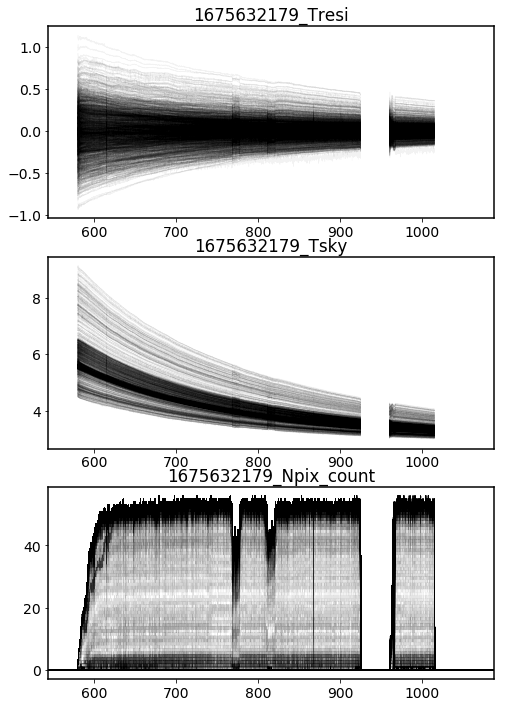

In [198]:
low = 0
high = 4096
# low = 1500
# high = 1900
loc1 = freqs[1690]
loc2 = freqs[1691]
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
tmp = Tresi_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[0].plot(freqs[low:high], tmp[:, low:high].T, color="black", linewidth=0.5, alpha=0.05)
# axes[0].axvline(x=loc1, color="red", linestyle="--", linewidth=1)
# axes[0].axvline(x=loc2, color="red", linestyle="--", linewidth=1)
axes[0].set_xlim(freqs[low], freqs[high-1])
axes[0].set_title(fname_list[0] + '_Tresi')
tmp = Tsky_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[1].plot(freqs[low:high], tmp[:, low:high].T, color="black", linewidth=0.5, alpha=0.05)
# axes[1].axvline(x=loc1, color="red", linestyle="--", linewidth=1)
# axes[1].axvline(x=loc2, color="red", linestyle="--", linewidth=1)
axes[1].set_xlim(freqs[low], freqs[high-1])
axes[1].set_title(fname_list[0] + '_Tsky')
tmp = Npix_count_2179[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
axes[2].plot(freqs[low:high], tmp[:, low:high].T, color="black", linewidth=0.5, alpha=0.05)
axes[2].set_xlim(freqs[low], freqs[high-1])
axes[2].set_title(fname_list[0] + '_Npix_count')
plt.show()

In [4]:
print(freqs[[1691, 1758, 2014, 2081]])

[768.5859375 777.484375  811.484375  820.3828125]


Filename: /scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_1675632179_20250729_070000/1675632179_m000/1675632179_m000_Tsky_xy_p0.5d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (4096, 49, 105)   float64   


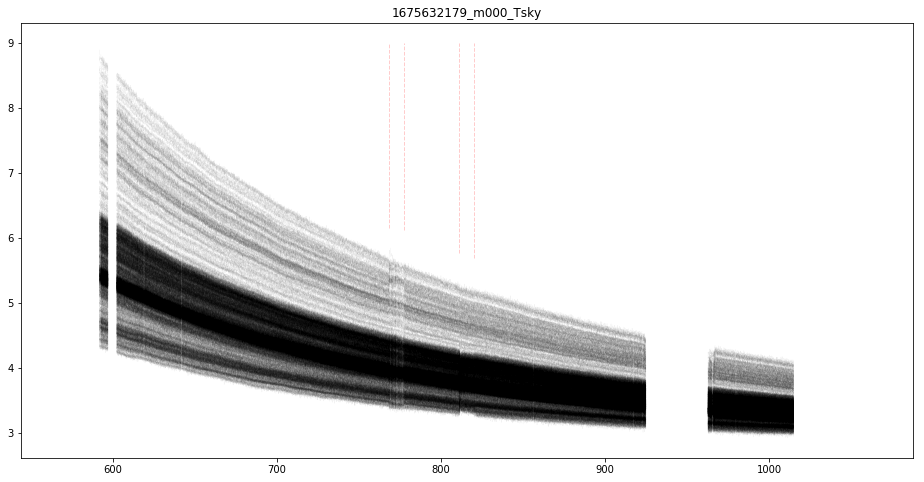

Filename: /scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_1675632179_20250729_070000/1675632179_m001/1675632179_m001_Tsky_xy_p0.5d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (4096, 49, 105)   float64   


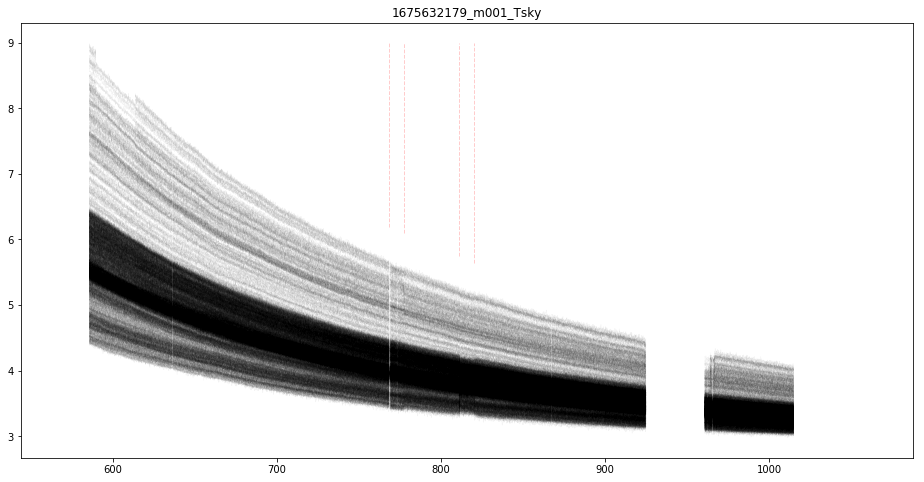

Filename: /scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_1675632179_20250729_070000/1675632179_m002/1675632179_m002_Tsky_xy_p0.5d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (4096, 49, 105)   float64   


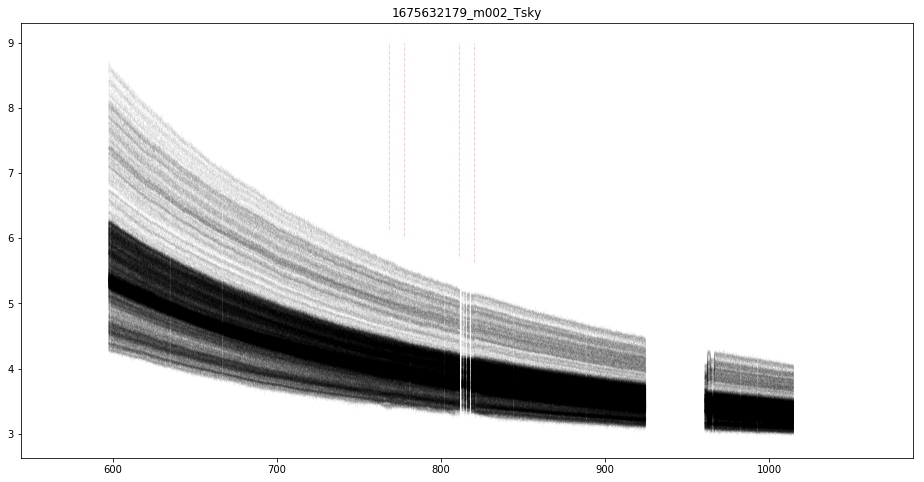

Filename: /scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_1675632179_20250729_070000/1675632179_m003/1675632179_m003_Tsky_xy_p0.5d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (4096, 49, 105)   float64   


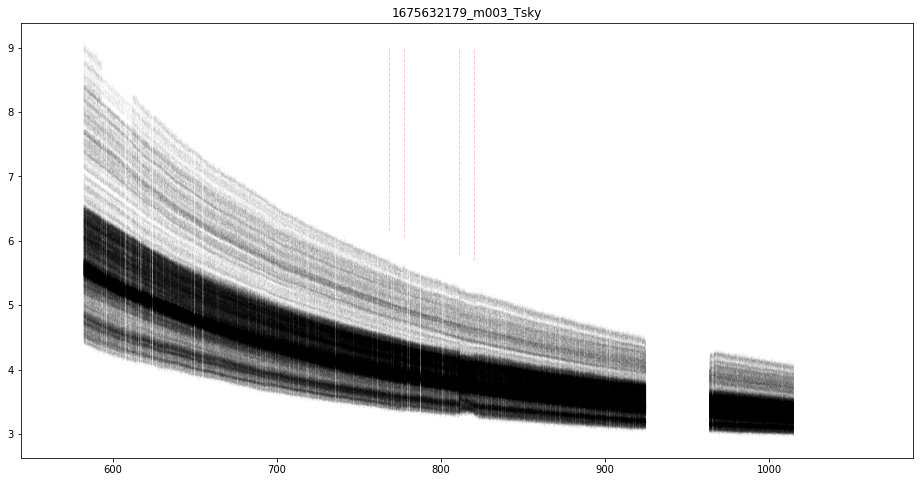

Filename: /scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_1675632179_20250729_070000/1675632179_m004/1675632179_m004_Tsky_xy_p0.5d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (4096, 49, 105)   float64   


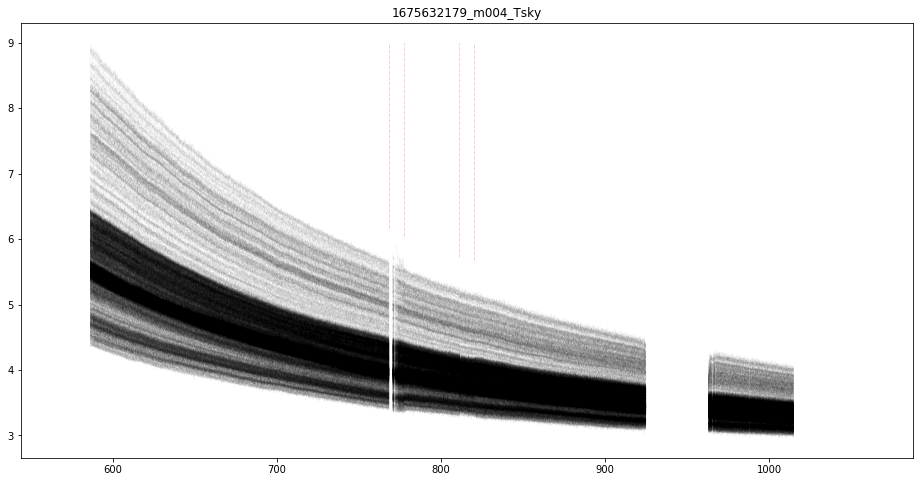

In [5]:
output_file_2179 = os.path.join(input_file_2179, 'figures')
os.makedirs(output_file_2179, exist_ok=True)
savefig = False
for a_i in range(5):
    try:
        ant='m'+ "%03d" % a_i
        with open(input_file_2179 + f'{fname_list[0]}_{ant}_level6_p0.5d_sigma4.0_iter2_mask', 'rb') as f:
            ch_mask = pickle.load(f)['ch_mask']
        input_file5_2179 = f'/scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_{fname_list[0]}_20250729_070000'
        with fits.open(os.path.join(input_file5_2179+'/'+fname_list[0]+f'_{ant}/'+fname_list[0]+f'_{ant}_Tsky_xy_p0.5d.fits')) as hdul:
            hdul.info()
            data = hdul[0].data
            header = hdul[0].header
        data[:, :, ch_mask] = np.nan
        low = 0
        high = 4096
        fig, ax = plt.subplots(figsize=(16, 8))
        tmp = data[:, :, :]
        tmp = tmp.reshape(-1, tmp.shape[-1])
        ax.vlines(x=freqs[1690], ymin=np.nanmax(tmp[:, 1690]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
        ax.vlines(x=freqs[1759], ymin=np.nanmax(tmp[:, 1759]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
        ax.vlines(x=freqs[2013], ymin=np.nanmax(tmp[:, 2013]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
        ax.vlines(x=freqs[2082], ymin=np.nanmax(tmp[:, 2082]) + 0.5, ymax=9, color="red", linestyle="--", linewidth=1, alpha=0.2)
        ax.plot(freqs[low:high], tmp[:, low:high].T, color="black", linewidth=0.5, alpha=0.05)
        # axes[0].axvline(x=loc1, color="red", linestyle="--", linewidth=1)
        # axes[0].axvline(x=loc2, color="red", linestyle="--", linewidth=1)
        ax.set_xlim(freqs[low], freqs[high-1])
        ax.set_title(fname_list[0] + f'_{ant}_Tsky')
        plt.show()
        if savefig:
            fig.savefig(os.path.join(output_file_2179, f'{fname_list[0]}_{ant}_Tsky.png'), bbox_inches='tight')

    except Exception as e:
        print(f"Error: {e}")

In [29]:
with open(input_file_2179 + '1675632179_m000_level6_p0.5d_sigma4.0_iter2_mask', 'rb') as f:
    ch_mask = pickle.load(f)['ch_mask']

In [30]:
input_file5_2179 = f'/scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_{fname_list[0]}_20250729_070000'
with fits.open(os.path.join(input_file5_2179+'/'+fname_list[0]+'_m000/'+fname_list[0]+'_m000_Tsky_xy_p0.5d.fits')) as hdul:
    hdul.info()
    data = hdul[0].data
    header = hdul[0].header

Filename: /scratch3/users/liutianyang/katcali_pipeline/level5/py_results/level5_1675632179_20250729_070000/1675632179_m000/1675632179_m000_Tsky_xy_p0.5d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (4096, 49, 105)   float64   


In [31]:
data[:, :, ch_mask] = np.nan

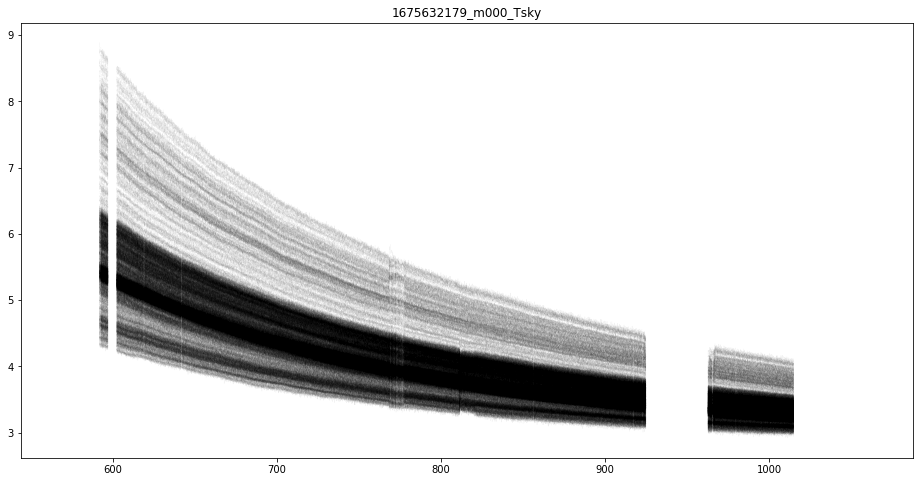

In [33]:
low = 0
high = 4096
fig, ax = plt.subplots(figsize=(16, 8))
tmp = data[:, :, :]
tmp = tmp.reshape(-1, tmp.shape[-1])
ax.plot(freqs[low:high], tmp[:, low:high].T, color="black", linewidth=0.5, alpha=0.05)
# axes[0].axvline(x=loc1, color="red", linestyle="--", linewidth=1)
# axes[0].axvline(x=loc2, color="red", linestyle="--", linewidth=1)
ax.set_xlim(freqs[low], freqs[high-1])
ax.set_title(fname_list[0] + '_m000_Tsky')
plt.show()

In [35]:
output_file_2179 = os.path.join(input_file_2179, 'figures')

In [36]:
output_file_2179

'./results/jupyter_results/desi2_20250829_033000/figures'